# Self-Organizing Maps demo with Iris dataset

This Jupyter Notebook is used internally for demonstrating SOMs and the Kohonen package in R, using the Iris dataset.

For questions, please contact me at: Marcel van den Bosch <marcel@marcel.im>

### Change Jupyter Notebook plot size settings

In [755]:
options(repr.plot.width=6, repr.plot.height=6,repr.plot.pointsize=8, repr.plot.res = 90)

### Load package and the iris dataset

In [698]:
require(kohonen)

In [699]:
set.seed(1234);
data(iris)

In [700]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


This dataset has  several measurements (features) and a target label, which is the species.

In the character vector below, we specify our features of interest.

In [702]:
features <- c('Sepal.Length','Sepal.Width','Petal.Length','Petal.Width')

### Visualize the map with the features of interest
Below we scale our Iris features and create a 6 x 4 rectangular grid. The resulting plot, is the
default SOM plot, which shows the codebook vectors created as these pie representatons for the grid cells. The radius of a wedge corresponds to the magnitude in a particular dimension.

In [785]:
iris.som <- som(scale(iris[features]), grid = somgrid(6, 4, "rectangular"))
summary(iris.som)

SOM of size 6x4 with a rectangular topology and a bubble neighbourhood function.
Training data included of 150 objects
The number of layers is 1
Mean distance to the closest unit in the map: 0.1833333


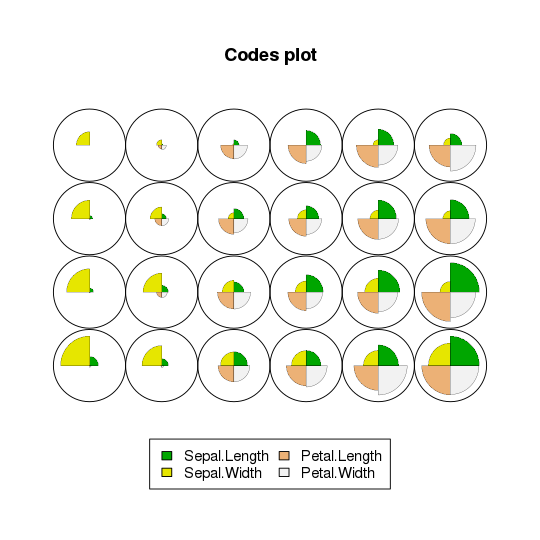

In [786]:
plot(iris.som)

### Plot the Iris Counts per node
The SOM count plot creates a heatmap based on the number of Iris samples assigned to each cell.

In [748]:
colors <- function(n, alpha = 0.5) {
    rev(heat.colors(n, alpha))
}

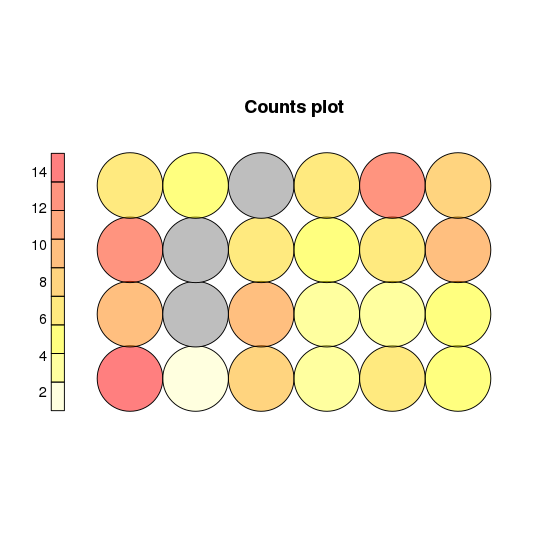

In [749]:
plot(iris.som, type = "counts", palette.name = colors, heatkey = TRUE)

### Plotting Points
Alternatively you could plot the Iris samples as points on the grid using the “mapping” plot. We do it side by side with the regular SOM to start to make visual comparisons.

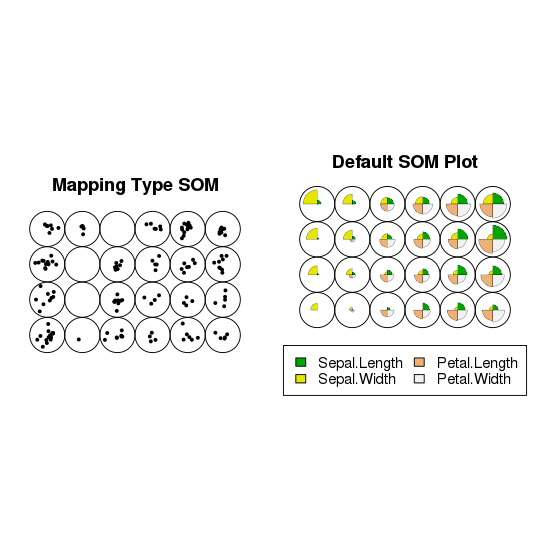

In [750]:
par(mfrow = c(1, 2))
plot(iris.som, type = "mapping", pchs = 20, main = "Mapping Type SOM")
plot(iris.som, main = "Default SOM Plot")

### Changing the geometry of the Maps
In the example below, we changed the geometry of the map (hexagonal oriented grid, in toroidal shape)

In [753]:
iris.som2 <- som(scale(iris[features]), grid = somgrid(6, 6, "hexagonal",toroidal = TRUE))

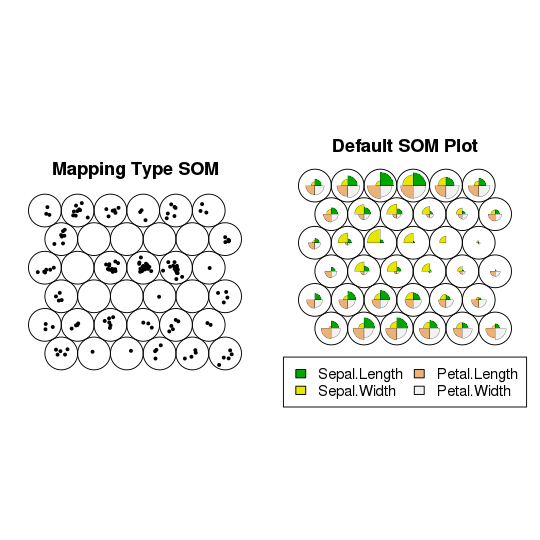

In [754]:
par(mfrow = c(1, 2))
plot(iris.som2, type = "mapping", pchs = 20, main = "Mapping Type SOM")
plot(iris.som2, main = "Default SOM Plot")

### Distance to neighbour nodes
When we plot with type = "dist.neighbours", the cells are colored depending on the overall distance to their nearest neighbors, which allows us to visualize how far apart different features are in the higher dimensional space.

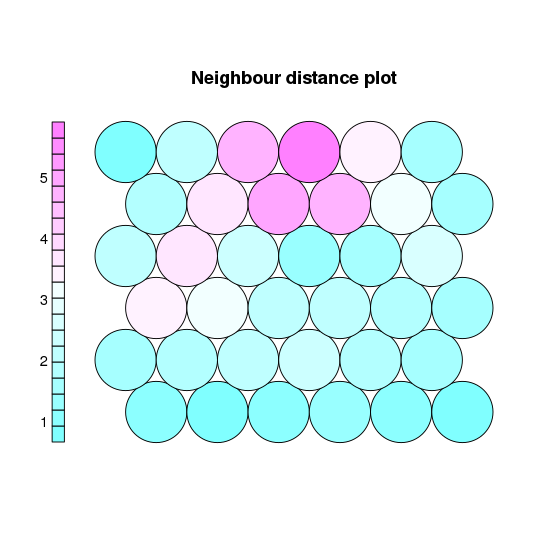

In [758]:
plot(iris.som2, type = "dist.neighbours", palette.name = cm.colors)

### Mapping with labels
In the plot below you can see how the different target labels (for each sample) is organized in the map.

Please note that we have the following unique species in the Iris dataset:

In [761]:
unique(iris$Species)

[1] setosa     versicolor virginica 
Levels: setosa versicolor virginica

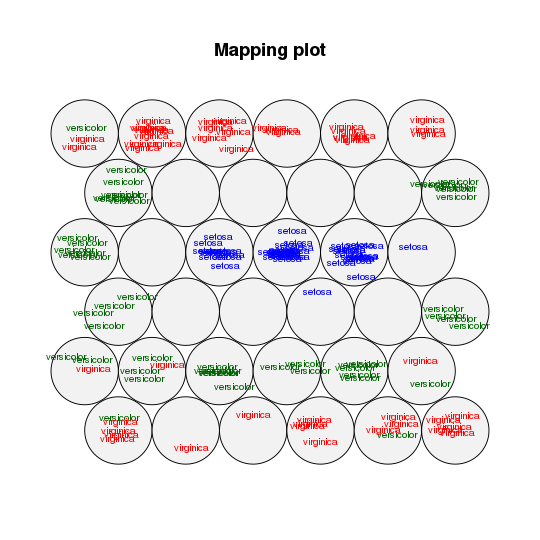

In [775]:
palette.m <- c("blue", "darkgreen", "red")

plot(iris.som2,
     type = "mapping",
     col = palette.m[as.factor(iris$Species)],
     bgcol = "gray95",
     labels = iris$Species, cex = 0.65)

### Viewing predictions and cluster boundaries
This view allows us to compare measurements to the predicted species, but doesn’t really give us any idea about 
the accuracy of these labels or how well the Iris samples map into these labels.

In [777]:
iris.som3 <- xyf(scale(iris[, features]), classvec2classmat(iris[, "Species"]), 
    grid = somgrid(6, 6, "hexagonal"))

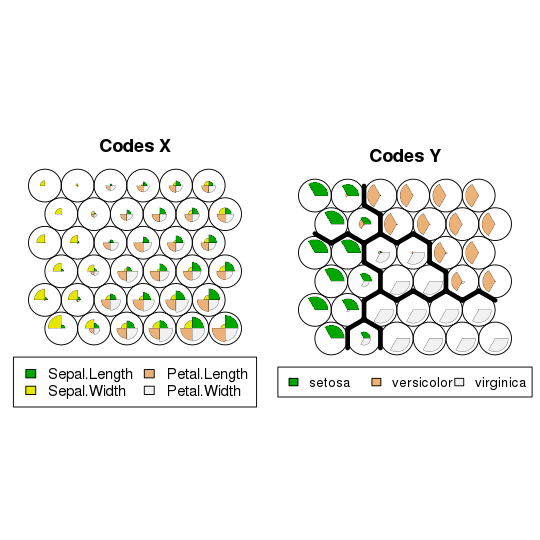

In [778]:
par(mfrow = c(1, 2))
plot(iris.som3, type = "codes", main = c("Codes X", "Codes Y"))
iris.som3.hc <- cutree(hclust(object.distances(iris.som3, "codes")), 5)
add.cluster.boundaries(iris.som3, iris.som3.hc)

### Supervised version of Kohonen's self-organising maps
Besides creating unsupervised maps, we can also predict using supervised learning.
This is done with the ```xyf``` function.

The name stands for X-Y fused SOMs. One vector for each object is created by concatenating X and Y, and a SOM is trained in the usual way, with one exception: the distance of an object to a unit is the sum of separate distances for X and Y spaces. Prediction is done only using the X-space.

```xyf``` is based on supersom. A supersom is an extension of self-organising maps (SOMs) to multiple data layers, possibly with
different numbers and different types of variables (though equal numbers of objects).

In [780]:
#randomly divide our data into training and testing sets.
training_indices <- sample(nrow(iris), round(nrow(iris)*0.7))
iris.training <- scale(iris[training_indices, features])
iris.testing <- scale(iris[-training_indices, features], center = attr(iris.training, 
    "scaled:center"), scale = attr(iris.training, "scaled:scale"))

iris.training.labels <- iris$Species[training_indices];

In [781]:
head(iris.training)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
74,0.36810951,-0.5453969,0.6006377,0.07122129
4,-1.41580582,0.1053608,-1.1980633,-1.24074977
106,2.15202485,-0.1115585,1.6686164,1.25199524
17,-0.46438431,1.8407147,-1.3104822,-0.97835556
15,0.01132645,2.0576339,-1.3666916,-1.24074977
77,1.20060334,-0.5453969,0.6568471,0.33361550


In [782]:
iris.som9 <- xyf(iris.training, classvec2classmat(iris.training.labels), 
    grid = somgrid(4, 4, "hexagonal",neighbourhood.fct = "bubble", toroidal = FALSE), 
                 rlen = 300,user.weights=0.5,normalizeDataLayers=TRUE)

In [783]:
summary(iris.som9)

SOM of size 4x4 with a hexagonal topology and a bubble neighbourhood function.
Training data included of 105 objects
The number of layers is 2
Mean distance to the closest unit in the map: 0.01166473


In [784]:
iris.pred <- predict(iris.som9, newdata = data.frame(iris.testing))
table(iris[-training_indices, ]$Species, iris.pred$prediction[[2]])

            
             setosa versicolor virginica
  setosa          0          4         1
  versicolor      0          1         0
  virginica       2          1         0

#### Acknowledgement
Part of this tutorial is based on the SOM NBA Player data tutorial by Dan Tanner ( https://clarkdatalabs.github.io/soms/SOM_NBA ) 